In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import tt
import experiments_stuff
from bilinear_package.src import primitives
from bilinear_package.src.hadamard_product import generalizedApproximateHadamardProduct

In [23]:
def create_inverse_index_sums(n, d):
    nats = np.reshape(np.arange(0, n), (1, n, 1))
    ones = np.reshape(np.ones(n), (1, n, 1))
    base = [ones for _ in range(d)]
    X = []
    for i in range(d):
        kek = base.copy()
        kek[i] = nats.copy()
        X.append(tt.vector.from_list(kek))
    c = tt.multifuncrs2(X, lambda x: 1 / (1 + np.sum(x, axis = 1)), eps=1E-6, verb=0)
    return tt.vector.to_list(c)

In [13]:
from itertools import chain

def create_inverse_index_sums_tensorized(n, d, QTT_d):
    nats = tt.xfun(n, QTT_d)
    ones = tt.ones(n, QTT_d)
    base = [ones for _ in range(d)]
    X = []
    for i in range(d):
        tmp = base.copy()
        tmp[i] = nats.copy()
        X.append(tmp)
    print(chain(X))
    c = tt.multifuncrs2(X, lambda x: 1 / (1 + np.sum(x, axis = 1)), eps=1E-6, verb=0)
    return tt.vector.to_list(c)

In [14]:
create_inverse_index_sums_tensorized(2, 3, 3)

[[This is a 3-dimensional tensor 
r(0)=1, n(0)=2 
r(1)=2, n(1)=2 
r(2)=2, n(2)=2 
r(3)=1 
, This is a 3-dimensional tensor 
r(0)=1, n(0)=2 
r(1)=1, n(1)=2 
r(2)=1, n(2)=2 
r(3)=1 
, This is a 3-dimensional tensor 
r(0)=1, n(0)=2 
r(1)=1, n(1)=2 
r(2)=1, n(2)=2 
r(3)=1 
], [This is a 3-dimensional tensor 
r(0)=1, n(0)=2 
r(1)=1, n(1)=2 
r(2)=1, n(2)=2 
r(3)=1 
, This is a 3-dimensional tensor 
r(0)=1, n(0)=2 
r(1)=2, n(1)=2 
r(2)=2, n(2)=2 
r(3)=1 
, This is a 3-dimensional tensor 
r(0)=1, n(0)=2 
r(1)=1, n(1)=2 
r(2)=1, n(2)=2 
r(3)=1 
], [This is a 3-dimensional tensor 
r(0)=1, n(0)=2 
r(1)=1, n(1)=2 
r(2)=1, n(2)=2 
r(3)=1 
, This is a 3-dimensional tensor 
r(0)=1, n(0)=2 
r(1)=1, n(1)=2 
r(2)=1, n(2)=2 
r(3)=1 
, This is a 3-dimensional tensor 
r(0)=1, n(0)=2 
r(1)=2, n(1)=2 
r(2)=2, n(2)=2 
r(3)=1 
]]


AttributeError: 'list' object has no attribute 'is_complex'

In [24]:
def create_sqrt_inverse_index_sums(d, n):
    nats = np.reshape(np.arange(0, d), (1, d, 1))
    ones = np.reshape(np.ones(d), (1, d, 1))
    base = [ones for _ in range(n)]
    X = []
    for i in range(n):
        kek = base.copy()
        kek[i] = nats.copy()
        X.append(tt.vector.from_list(kek))
    c = tt.multifuncrs2(X, lambda x: 1 / np.sqrt(1 + np.sum(np.sqrt(x), axis = 1)), eps=1E-12, verb=0)
    return tt.vector.to_list(c)

In [25]:
import time
answer1 = []
answer2 = []
answer3 = []
answer4 = []
answer5 = []
answer6 = []
grid = range(10, 51, 10)
for rank in grid:
    a = create_sqrt_inverse_index_sums(rank, 5)
    b = a.copy()
    r = experiments_stuff.get_random_tensor_for_experiment(5, rank, rank, 38 * rank + rank)
    a1 = tt.vector.from_list(a)
    b1 = tt.vector.from_list(b)
    precise = tt.vector.to_list(a1 * b1)
    print(tt.vector.from_list(a))
    print(tt.vector.from_list(b))
    print(tt.vector.from_list(precise))
    print(f'{rank} a')
    full_prod = a1 * b1
    bench = time.time()
    tensor = (a1 * b1).round(0, rank)
    answer2.append(time.time() - bench)
    print(f'{rank} b')
    answer1.append(primitives.ttTensorsUnsymmetricalRelativeComparance(tt.vector.to_list(tensor), precise))
    print(f'{rank} c')
    bench = time.time()
    tensor = generalizedApproximateHadamardProduct(a, b, r)
    answer4.append(time.time() - bench)
    print(f'{rank} d')
    answer3.append(primitives.ttTensorsUnsymmetricalRelativeComparance(tensor, precise))
    print(f'{rank} e')
    bench = time.time()
    tensor = tt.multifuncrs2([a1, b1], lambda x: x[:, 0] * x[:, 1], eps=1E-6, verb=0)
    answer6.append(time.time() - bench)
    print(f'{rank} f')
    answer5.append(primitives.ttTensorsUnsymmetricalRelativeComparance(tt.vector.to_list(tensor), precise))
    print(answer1)
    print(answer2)
    print(answer3)
    print(answer4)
    print(answer5)
    print(answer6)


This is a 5-dimensional tensor 
r(0)=1, n(0)=10 
r(1)=10, n(1)=10 
r(2)=14, n(2)=10 
r(3)=14, n(3)=10 
r(4)=13, n(4)=10 
r(5)=1 

This is a 5-dimensional tensor 
r(0)=1, n(0)=10 
r(1)=10, n(1)=10 
r(2)=14, n(2)=10 
r(3)=14, n(3)=10 
r(4)=13, n(4)=10 
r(5)=1 

This is a 5-dimensional tensor 
r(0)=1, n(0)=10 
r(1)=100, n(1)=10 
r(2)=196, n(2)=10 
r(3)=196, n(3)=10 
r(4)=169, n(4)=10 
r(5)=1 

10 a
10 b
10 c
10 d
10 e
10 f
[5.814617547251584e-08]
[0.04713082313537598]
[6.190133077480119e-08]
[0.007300376892089844]
[3.6774870344193474e-08]
[0.020560264587402344]
This is a 5-dimensional tensor 
r(0)=1, n(0)=20 
r(1)=14, n(1)=20 
r(2)=15, n(2)=20 
r(3)=15, n(3)=20 
r(4)=14, n(4)=20 
r(5)=1 

This is a 5-dimensional tensor 
r(0)=1, n(0)=20 
r(1)=14, n(1)=20 
r(2)=15, n(2)=20 
r(3)=15, n(3)=20 
r(4)=14, n(4)=20 
r(5)=1 

This is a 5-dimensional tensor 
r(0)=1, n(0)=20 
r(1)=196, n(1)=20 
r(2)=225, n(2)=20 
r(3)=225, n(3)=20 
r(4)=196, n(4)=20 
r(5)=1 

20 a
20 b
20 c
20 d
20 e
20 f
[5.81461754

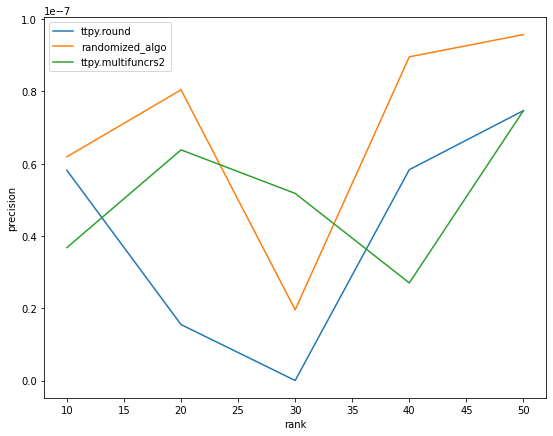

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig.set_size_inches((9, 7))

ax.set_xlabel("rank")
ax.set_ylabel("precision")
ax.plot(grid, answer1, label="ttpy.round")
ax.plot(grid, answer3, label="randomized_algo")
ax.plot(grid, answer5, label="ttpy.multifuncrs2")
ax.legend()

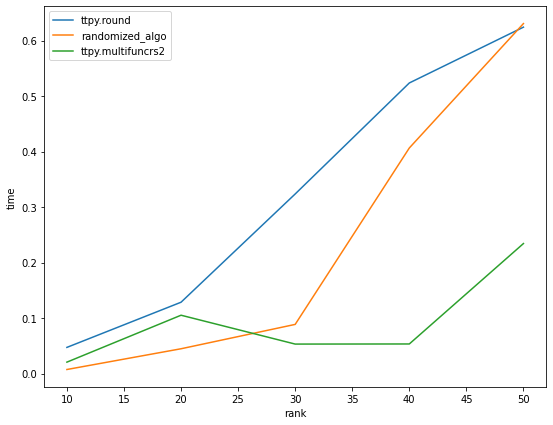

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig.set_size_inches((9, 7))

ax.set_xlabel("rank")
ax.set_ylabel("time")
ax.plot(grid, answer2, label="ttpy.round")
ax.plot(grid, answer4, label="randomized_algo")
ax.plot(grid, answer6, label="ttpy.multifuncrs2")
ax.legend()

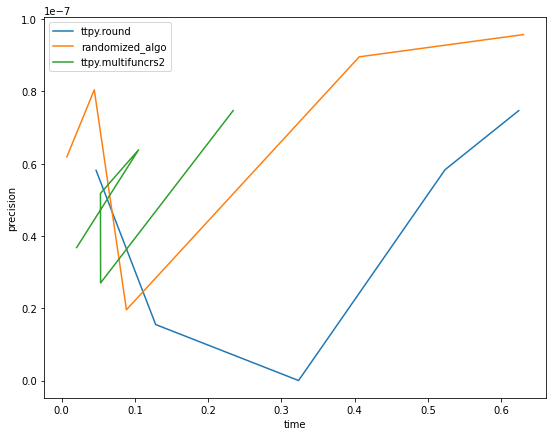

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig.set_size_inches((9, 7))

ax.set_xlabel("time")
ax.set_ylabel("precision")
ax.plot(answer2, answer1, label="ttpy.round")
ax.plot(answer4, answer3, label="randomized_algo")
ax.plot(answer6, answer5, label="ttpy.multifuncrs2")
ax.legend()